<a href="https://colab.research.google.com/github/redcoding72/EDUBlib-Introduction-Sciences-des-donn-e-AI/blob/main/Copie_de_01_prod_sport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Tables des matières<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Tutoriel-complet-Regression-lineaire" data-toc-modified-id="Tutoriel-complet-Regression-lineaire-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Tutoriel complet Regression lineaire</a></span><ul class="toc-item"><li><span><a href="#Collecter-data-en-utilisant-pandas" data-toc-modified-id="Collecter-data-en-utilisant-pandas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Collecter data en utilisant pandas</a></span></li></ul></li><li><span><a href="#identification-des-descripteurs,-cible-et-observations" data-toc-modified-id="identification-des-descripteurs,-cible-et-observations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>identification des descripteurs, cible et observations</a></span></li><li><span><a href="#Tracé-des-relations-entre-les-descripteurs-et-la-cible" data-toc-modified-id="Tracé-des-relations-entre-les-descripteurs-et-la-cible-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tracé des relations entre les descripteurs et la cible</a></span></li><li><span><a href="#Tracé-des-correlations-entre-les-différents-descripteurs-et-cible" data-toc-modified-id="Tracé-des-correlations-entre-les-différents-descripteurs-et-cible-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tracé des correlations entre les différents descripteurs et cible</a></span></li><li><span><a href="#Développement-du-modele-linear-regression" data-toc-modified-id="Développement-du-modele-linear-regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Développement du modele linear regression</a></span></li></ul></div>

# Tutoriel complet Regression lineaire

## Collecter data en utilisant pandas

In [1]:
# modules nécessaires pour le notebook
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# lire le fichier de données
#utiliser le param index_col: Column to use as the row labels of the DataFrame
URL_sports   = 'https://drive.google.com/file/d/1lgplZcn7U122oN3smsPyrOfhDPRIY5E_/view'
data_sport =  'https://drive.google.com/uc?export=download&id='+URL_sports.split('/')[-2]
df = pd.read_csv(data_sport, index_col=0)
df.head()

,velo,tapis,halteres,pct_muscle
0,168.4,7.1,12.8,11.7
1,142.9,29.3,12.6,15.0
2,206.8,5.2,19.4,12.2
3,137.9,46.4,59.0,19.2
4,70.6,16.0,40.8,10.5


In [4]:
df.describe()

,velo,tapis,halteres,pct_muscle
count,160.000000,160.000000,160.000000,160.000000
mean,145.581875,23.230000,30.398750,14.070625
std,86.003289,14.969116,21.942481,5.400054
min,0.700000,0.000000,0.300000,1.600000
25%,72.700000,9.750000,12.750000,10.300000
50%,139.900000,22.000000,25.600000,12.800000
75%,219.925000,36.650000,44.500000,17.700000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
rows = df.sample(frac =.80)
rows.head()
rows.reset_index(drop=True, inplace=True)
#sauvegarder le data
rows.to_csv("data_sport.csv",index=True)

# identification des descripteurs, cible et observations

Quels sont les descripteurs? On a 3 descripteurs dans ce dataset qui sont:

* Entrainement sur vélo stationnaire
* Entrainement sur tapis roulant
* Utilisation de haltères et poids

Quelle est la cible?

* Pct_musculaire: pourcentage d'augmentation de la masse musculaire

Quelle est la forme ou shape du dataframe?

In [7]:
df.shape

(160, 4)

On voit que l'on a 160 observations avec 4 colonnes dont 3 sont des descripteurs

# Tracé des relations entre les descripteurs et la cible

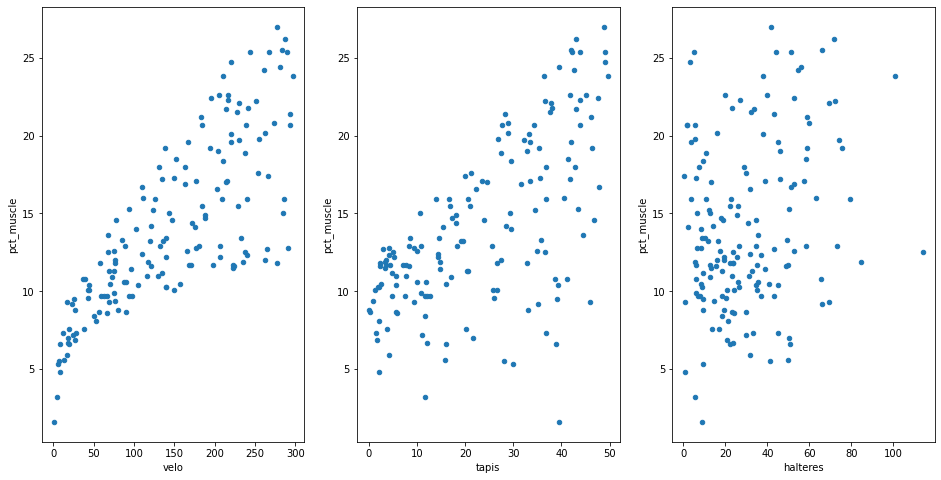

In [8]:
#utilisation d'une figure avec 3 plots aligné sur une ligne
fig, axes = plt.subplots(1,3,sharey=False)
df.plot(kind='scatter', x='velo', y='pct_muscle', 
        ax=axes[0], figsize=(16,8))
df.plot(kind='scatter', x='tapis', y='pct_muscle', 
        ax=axes[1], figsize=(16,8))
df.plot(kind='scatter', x='halteres', y='pct_muscle', 
        ax=axes[2], figsize=(16,8))

On voit au niveau des graphes qu'il existe une certaine relation linéaire entre Vélo et pct_muscle ainsi que Tapis et pct_muscle

# Tracé des correlations entre les différents descripteurs et cible

* On utilise ici seaborn pour avoir la matrice des correlations

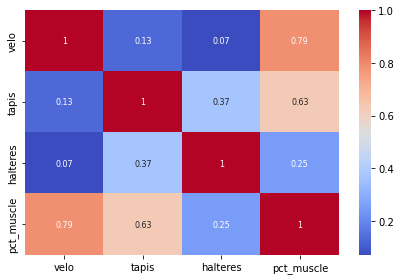

In [9]:
import seaborn as sns
#We can visualise the correlation between all the variables in the dataset using a heatmap in Seaborn
sns.heatmap(data=df.corr().round(2), 
            cmap='coolwarm', annot=True, annot_kws={"size":8})
plt.tight_layout()
plt.show()

On confirme qu'il n'y a pas vraiment de dépendance entre les descripteurs.

# Développement du modele linear regression

In [10]:
from sklearn.linear_model import LinearRegression
cols_predicteurs = ['velo','tapis','halteres']
#predicteurs
X = df[cols_predicteurs]
y = df.pct_muscle


In [11]:
#Effectuer la séparation Training-Test
from sklearn import model_selection 
 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, 
                                        y , test_size = 0.2, random_state=42)
#detail de chacun des sous-dataset
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(128, 3) (128,)
(32, 3) (32,)


In [12]:
#estimation des coeeficients du modele lineaire
lm = LinearRegression()
lm.fit(X_train,y_train)
#Afficher les coefficients
print(lm.intercept_)
print(lm.coef_)

2.909982113373802
[0.04583993 0.19234319 0.00047693]


In [13]:
#Afficher l'equation
list(zip(cols_predicteurs, lm.coef_))


[('velo', 0.04583992670169011),
 ('tapis', 0.19234319213443807),
 ('halteres', 0.00047693473161203315)]

In [ ]:
#Sauvegarder intercept et coefficient dans fichier
#fichier rl.csv ou rl.pkl csv ou pickle (dump et load)


In [14]:
# proceder au test
y_pred = lm.predict(X_test)

In [15]:
import numpy as np
#comparer les valeurs test et prédites
test_pred_df = pd.DataFrame( { 'Valeurs test': y_test,
                'Valeurs prédites': np.round( y_pred, 2),
                'residuels': y_test - y_pred } )
test_pred_df[0:10]

,Valeurs test,Valeurs prédites,residuels
105,12.9,11.90,1.002594
108,25.4,24.35,1.049655
141,12.6,13.11,-0.509707
55,8.1,5.76,2.342689
94,7.0,7.97,-0.969658
29,12.6,12.43,0.167100
101,10.3,9.71,0.588932
51,12.9,14.02,-1.122537
100,13.2,12.85,0.345713
142,5.3,8.91,-3.613062


In [16]:
from sklearn import metrics
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,
                                         y_pred)))

#Calcul du R-carré
r2 = metrics.r2_score(y_test, y_pred)
print(r2)

1.4473087105157847
0.9238655260342179
